# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/Behaviour_of_alignment_terms/'
base_directory_figure_str =  base_directory_str + '/figures/Behaviour_of_alignment_terms/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch


def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cuda


# Load MNIST

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )







str_dir_data_mnist = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(str_dir_data_mnist , "/content/mnist_data" )





In [ ]:

batch_size = 1000


train_loader50_shuffle , test_loader50_shuffle , code_map50_shuffle , x_shape50_shuffle   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = True )


train_loader50 , test_loader50 , code_map50 , x_shape50   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = False )



Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



# calculate autocorrelation matrix

In [ ]:
def calculate_autocorrelation_layer(  categories_kmo , categories_k ,   delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):



  autocorrelation_L_n  =  L_lm1_kmo.shape[0]*L_lm1_k.shape[0]
  autocorrelation_delta_n =  delta_lp1_kmo.shape[0]*delta_lp1_k.shape[0]

  autocorrelation_delta = torch.matmul ( delta_lp1_kmo , delta_lp1_k.t()  ).sum()
  autocorrelation_L=torch.matmul ( L_lm1_kmo , L_lm1_k.t()  ).sum() 



  within_category_autocorrelation_delta = 0
  between_category_autocorrelation_delta = 0

  within_category_autocorrelation_L = 0
  between_category_autocorrelation_L= 0



  within_category_autocorrelation_delta_n = 0
  between_category_autocorrelation_delta_n = 0

  within_category_autocorrelation_L_n  = 0
  between_category_autocorrelation_L_n = 0



  for digit1 in range(10):
      
   
        delta_lp1_k_digit0 = delta_lp1_k[categories_k==digit1,:]
        delta_lp1_kmo_digit1 = delta_lp1_kmo[categories_kmo==digit1,:]

        

        L_lm1_k_digit0 = delta_lp1_k[categories_k==digit1,:]
        L_lm1_kmo_digit1 = delta_lp1_kmo[categories_kmo==digit1,:]


     

        within_category_autocorrelation_delta    += torch.matmul ( delta_lp1_kmo_digit1 , delta_lp1_k_digit0.t()  ).sum()
        within_category_autocorrelation_delta_n  += delta_lp1_kmo_digit1.shape[0]*delta_lp1_k_digit0.shape[0]


        within_category_autocorrelation_L   += torch.matmul ( L_lm1_kmo_digit1 , L_lm1_k_digit0.t()  ).sum()
        within_category_autocorrelation_L_n += L_lm1_kmo_digit1.shape[0]*L_lm1_k_digit0.shape[0]


      
    
  between_category_autocorrelation_delta   = autocorrelation_delta - within_category_autocorrelation_L
  between_category_autocorrelation_delta_n  = autocorrelation_delta_n  - within_category_autocorrelation_delta_n


  between_category_autocorrelation_L   = autocorrelation_L - within_category_autocorrelation_L
  between_category_autocorrelation_L_n = autocorrelation_L_n - within_category_autocorrelation_L_n



  between_category_autocorrelation_delta = between_category_autocorrelation_delta /between_category_autocorrelation_delta_n
  within_category_autocorrelation_delta = within_category_autocorrelation_delta /within_category_autocorrelation_delta_n


  between_category_autocorrelation_L = between_category_autocorrelation_L /between_category_autocorrelation_L_n
  within_category_autocorrelation_L = within_category_autocorrelation_L /within_category_autocorrelation_L_n



  output = {
            "autocorrelation_delta" : autocorrelation_delta ,
            "autocorrelation_L" :autocorrelation_L  ,

            "between_category_autocorrelation_delta" :between_category_autocorrelation_delta,
            "within_category_autocorrelation_delta" :within_category_autocorrelation_delta,

            "between_category_autocorrelation_L" :between_category_autocorrelation_L,
            "within_category_autocorrelation_L" :within_category_autocorrelation_L,
            
                     
            "between_category_autocorrelation_delta_n" :between_category_autocorrelation_delta_n,
            "within_category_autocorrelation_delta_n" :within_category_autocorrelation_delta_n,
            "between_category_autocorrelation_L_n" :between_category_autocorrelation_L_n,
            "within_category_autocorrelation_L_n" :within_category_autocorrelation_L_n,


   }

  return     output



In [ ]:





def calculate_alignment_term_o_l_k_no_last_delta( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l    ):


  k=-1

  return calculate_alignment_term_no_last_delta( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] 
                                  ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] 
                                  )




def calculate_alignment_term_no_last_delta( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k    ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 



  return alignment_term_o_l_k


  







def calculate_alignment_term_o_l_k( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l   , eta_2 ):


  k=-1

  return calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )



def calculate_alignment_term_linear(    B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  alignment_term_o_l_k  )

  return alignment_term_o_l_k


def calculate_transformation_matrix_linear(    delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):


  

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )



  return alignment_term_o_l_k



def calculate_alignment_term_linear_diagonal(        B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  alignment_term_o_l_k  =  torch.diag(alignment_term_o_l_k.diagonal())

  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  alignment_term_o_l_k  )

  return alignment_term_o_l_k


def calculate_transformation_matrix_linear_diagonal(       delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )


  alignment_term_o_l_k  =  torch.diag(alignment_term_o_l_k.diagonal())

 

  return alignment_term_o_l_k

  

def calculate_alignment_term( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k




#zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k
def calculate_alignment_term_zeta( Dfunc ,  zeta_o_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k










def calculate_last_term_l_no_last_delta(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l      ):

  

   return calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = b_l[l]    )



def calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k     ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return  func( zeta_k_l_k.t()  )   









def calculate_last_term_l(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l  ,  delta_k_l  , eta  ):

  

   return calculate_last_term(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = net.bias_vec [l] ,  delta_lp1_k = delta_k_l[-1][l+1]  , eta = eta  )



def calculate_last_term(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k  ,  delta_lp1_k  , eta  ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return torch.matmul(   func( zeta_k_l_k.t()  )    ,   delta_lp1_k  ) * eta



def calculate_auto_correlation_neurons(   matrix_kmo , matrix_k  ):

  all_ones = torch.ones( [ matrix_kmo.shape[0] , matrix_k.shape[0]   ]  ).to(device)
  



  return torch.matmul(  torch.matmul(  matrix_kmo.t()   ,   all_ones  )    ,   matrix_k  ) .diag() /  matrix_k.shape[0] /  matrix_kmo.shape[0]







In [ ]:
def within_between_category_sum_product_similarity_L_delta(     similarity_delta , similarity_L , targets_kmo ,  targets_k     ):

    
    sum_product_within = 0
    sum_product_between = 0

    for digit1 in range(10):
      for digit2 in range(10):

        


            digit1_indices = torch.where(targets_kmo==digit1)[0]
            digit2_indices = torch.where(targets_k==digit2)[0]


            sum_product = torch.mul( similarity_delta[ digit1_indices  ][:,      digit2_indices  ] ,  similarity_L[ digit1_indices  ][:,      digit2_indices  ]   ).sum()

            if digit1 != digit2:

              sum_product_between+= sum_product



            if digit1 == digit2:

              sum_product_within+= sum_product

    return     sum_product_within ,  sum_product_between 




In [ ]:


def shuffled_similarity_matrix(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
        
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    



     

  similarity_matrix = similarity_matrix [  torch.randperm( similarity_matrix.size()[0])   ]



  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix
  # print(  categories   )

# shuffled_similarity_matrix_within(   delta_lp1_kmo = train_tensor_actual, delta_lp1_k = train_tensor_actual , targets_kmo = targets_tensor_actual ,  targets_k = targets_tensor_actual )  




def shuffled_similarity_matrix_within(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
  categories = torch.zeros_like(similarity_matrix)              
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    
  for digit1 in range(10):
    


    # print(targets_tensor_actual)
    digit_indices1 = torch.where(targets_kmo==digit1)[0]
    digit_indices2 = torch.where(targets_k==digit1)[0]


    categories[digit_indices1] = categories[digit_indices1] + digit1*10
    categories[: , digit_indices2] = categories[: , digit_indices2] + digit1

  categories = categories.reshape([-1])

  for digit1 in range(10):
    

      # if digit1==digit2:
        indices = torch.where ( digit1*10+digit1 == categories  )[0]

        indices_shuffle = indices [  torch.randperm( indices.size()[0])   ]


        similarity_matrix[indices]  =  similarity_matrix[indices_shuffle]
        # categories[indices]  =  categories[indices_shuffle]

  
  # categories = categories.reshape(  similarity_matrix_initial_shape   )
  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix



def shuffled_similarity_matrix_between(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
  categories = torch.zeros_like(similarity_matrix)              
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    
  for digit1 in range(10):
    


    # print(targets_tensor_actual)
    digit_indices1 = torch.where(targets_kmo==digit1)[0]
    digit_indices2 = torch.where(targets_k==digit1)[0]


    categories[digit_indices1] = categories[digit_indices1] + digit1*10
    categories[: , digit_indices2] = categories[: , digit_indices2] + digit1

  categories = categories.reshape([-1])

  for digit1 in range(10):
     for digit2 in range(10):

        if digit1!=digit2:
          indices = torch.where ( digit1*10+digit2 == categories  )[0]

          indices_shuffle = indices [  torch.randperm( indices.size()[0])   ]


          similarity_matrix[indices]  =  similarity_matrix[indices_shuffle]
          # categories[indices]  =  categories[indices_shuffle]

    
  # categories = categories.reshape(  similarity_matrix_initial_shape   )
  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix
  # print(  categories   )

# shuffled_similarity_matrix_within(   delta_lp1_kmo = train_tensor_actual, delta_lp1_k = train_tensor_actual , targets_kmo = targets_tensor_actual ,  targets_k = targets_tensor_actual )  

# Single run function

In [ ]:


def Single_run_function(str_dir_data_BASE 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 100
       
           ):



  batch_size = 1000
  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                     , batch_size=batch_size , device = device  
                                                                                     , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )






  N_hidden = len(code_map[0][0])

  

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"

  # str_direction_disc = str_direction_disc + "(Linear)"

  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"



  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)




  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  save_model_iterations = []
  
  if save_details == True :

    

    Save_dict = {
         "test_accuracy" : torch.zeros( [ N_repeat , N_epoch]  ),

         "angle sum aln B" :  torch.zeros( [N_layers , N_repeat  ]  ),
         "angle sum aln + last term B" :  torch.zeros( [N_layers , N_repeat  ]  ),
         "angle last term B" :  torch.zeros( [N_layers , N_repeat  ]  ),
         "retio norm sum aln to last term" :  torch.zeros( [N_layers , N_repeat  ]  )

    }



            
                     
         
            





    alignment_term_sampling_k = [ 66  , 1260 ]

    alignment_term_sampling_k_max_o = 1260

    for k in alignment_term_sampling_k:
      for o in range(   1   ,   np.min([k,alignment_term_sampling_k_max_o])      ):
        Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
        Save_dict["random_data_angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
        Save_dict["norm_T_align_"+ str(o) + "_" +  str(k)  ] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
        Save_dict["norm_T_align_"+ str(o) + "_" +  str(k)  + "to_W"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')




    Save_dict["angle_sum_T_align_1260_m60"  ] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
    Save_dict["norm_sum_T_align_1260_m60"  ] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')


    Save_dict["angle_sum_T_align_1260_notm60"  ] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
    Save_dict["norm_sum_T_align_1260_notm60"  ] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')


    sampling_lags = [1,59,60,61,120]

    for o in sampling_lags:
      Save_dict["angle_T_align_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')




    for key in Save_dict:
      if type(Save_dict[key]) ==  type(torch.tensor([1])):
        Save_dict[key][:] =  float('nan')



  


  sampling_list = np.array(  list( range(103,60*N_epoch,10))  + list( range(5,100,3) ) + list( range(1,5) )   )  


  sampling_noise  =  np.random.randint(0,4 , len(sampling_list) )
  sampling_noise[0:20]=0


  sampling_list = sampling_list +  sampling_noise




  eta_2 = lr*lr
  for rep in range(N_repeat):

    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )



    train_dataset = train_loader.dataset


    train_tensor = train_dataset.tensors[0].to(device)  
    targets_tensor = train_dataset.tensors[1].to(device)  











    if rep <=3:
      str_direction = str_dir_data_BASE_exp + "code_map_"  +  str(rep) +  ".txt"
      with open( str_direction  , "wb") as fp:   #Pickling
        pickle.dump( code_map  , fp)


    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_k_l = []
      delta_BP_k_l = []
      # E_list_k_l = []
      L_k_l = []
      Z_k_l = []
      W_k_l = []
      target_k = []


      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)
    Dfunc = net.derivative_activation1

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):



########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal



      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100


      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
##########################################################
     

      ########################################################## Train  
      for iter , (x_in, y_n) in enumerate( train_loader ):




        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        

        for persist_i in range(persistence):

          if iteration_k in save_model_iterations:
            str_direction = str_dir_data_BASE_exp + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
            net.save_model(str_direction)


 
          if save_details == True :
            W_l = []
            target_k .append( my_coding.decode_category( code_map , [ y_n ]  ).view([-1]  ).to('cpu').clone()  )
            for l in range(L_N_layers):
              W_l .append(  net.W[l].detach().clone() )
            W_k_l . append(  W_l   )
            



          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          


          L_f = net.forward(x_in)


          E = y_n - L_f

          if compare_with_BP==True or FA_method==False:
            Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP

          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          


################################################## Update Weights

          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  


          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:

              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()


          if compare_with_BP==True :
            for l in range(N_layers):
              angle_dW_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

            for l in range(1,N_layers+1):
              angle_dBiad_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
           




          


  

                  

              

          if save_details == True :
    
          #   for l in range(N_layers):
          #     dW_norms[  l  ,  rep  ,  iteration_k   ] = lr*Delta_fa[l].norm()
          #     dW_norms_BP[  l  ,  rep  ,  iteration_k   ] = lr*Delta_bp[l].norm()


            delta_l = []
            # E_l = []
            L_l = []
            Z_l = []

            for l in range(L_N_layers+1):
              L_l .append(net.L[l].detach().clone())

            delta_l.append(None)
            # E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              if FA_method==True:
                delta_l.append(net.delta_FA[l].detach().clone())
              if FA_method==False:
                delta_l.append(net.delta_BP[l].detach().clone())

              # E_l.append(net.E_FA[l].detach().clone())
              Z_l .append(net.Z[l].detach().clone())



            delta_k_l . append(  delta_l  )
            # delta_BP_k_l.append(  delta_BP_l  )
            # E_list_k_l . append(  E_l   )
            L_k_l . append(  L_l   )
            Z_k_l . append(  Z_l   )

            


            if  iteration_k in alignment_term_sampling_k :

              for  l in range(1,L_N_layers):

                norm_Wl = net.W[l].norm()

                for o in range(   1   ,   np.min([ iteration_k  , alignment_term_sampling_k_max_o  ])      ):
                  k=-1

                  alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                      ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                      ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                      ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )     
                  if o == 1: 

                    alignment_term_sum = alignment_term

                  else:
                    alignment_term_sum += alignment_term


                  if o%60 == 0:
                    if o == 60: 

                      alignment_term_sum_60 = alignment_term

                    else:
                      alignment_term_sum_60 += alignment_term
                  
                  else:
                    if o == 1: 

                      alignment_term_sum_not60 = alignment_term

                    else:
                      alignment_term_sum_not60 += alignment_term             



                          
                  # alignment_term = calculate_alignment_term_linear(
                  #                   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                  #                   ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                  #                   ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )

                  Save_dict["angle_T_align_"+ str(o) + "_" +  str(iteration_k)  +"_B"] [l , rep  ]   = my_weight.angle(   alignment_term   , net.B[l].t()   ) 

                  Save_dict["norm_T_align_"+ str(o) + "_" +  str(iteration_k)  ]  [l , rep  ]  = alignment_term.norm()
                  Save_dict["norm_T_align_"+ str(o) + "_" +  str(iteration_k)  + "to_W"]  [l , rep  ]   = alignment_term.norm() / norm_Wl

                  Save_dict["norm_T_align_"+ str(o) + "_" +  str(iteration_k)  ]  [l , rep  ]  = alignment_term.norm()
                  Save_dict["norm_T_align_"+ str(o) + "_" +  str(iteration_k)  + "to_W"]  [l , rep  ]   = alignment_term.norm() / norm_Wl
                  


                Save_dict["angle_sum_T_align_1260_m60"  ]  [l , rep  ]  = my_weight.angle(   alignment_term_sum_60   , net.B[l].t()   ) 
                Save_dict["norm_sum_T_align_1260_m60"  ]  [l , rep  ]  = alignment_term_sum_60.norm()


                Save_dict["angle_sum_T_align_1260_notm60"  ]  [l , rep  ]  = my_weight.angle(   alignment_term_sum_not60   , net.B[l].t()   ) 
                Save_dict["norm_sum_T_align_1260_notm60"  ]  [l , rep  ]  = alignment_term_sum_not60.norm()



                angle0  =  my_weight.angle(   alignment_term_sum   , net.B[l].t()   ) 
                print("l: " + str(l) + " angle sum_aln B: " + str(angle0)   )


                alignment_term_last_term = calculate_last_term_l_no_last_delta(  l ,   func = net.activation1   , W_lm1_0 = W_k_l[0][l-1] , L_k_l = L_k_l
                                                    ,   b_l=net.bias_vec      )*lr


                alignment_term_last_term = torch.matmul(  alignment_term_last_term.detach()   ,  delta_k_l[-1][l+1]  )  

                angle1  =  my_weight.angle(   alignment_term_sum + alignment_term_last_term   , net.B[l].t()   ) 

                print("l: " + str(l) + " angle sum_aln + last B : " + str(angle1)  )

                angle2  =  my_weight.angle(    alignment_term_last_term   , net.B[l].t()   ) 

                print("l: " + str(l) + " angle last B : " + str(angle2)  )


                norm_ratio  =     alignment_term_sum.norm()  /  alignment_term_last_term.norm()   

                print("l: " + str(l) + " norm_ratio : " + str(norm_ratio)  )



                Save_dict["angle sum aln B"]  [l , rep] =   angle0
                Save_dict["angle sum aln + last term B"] [l , rep]=  angle1
                Save_dict["angle last term B"][l , rep] = angle2
                Save_dict["retio norm sum aln to last term"][l , rep] = norm_ratio




            if iteration_k in sampling_list :
              
           
                for  l in range(1,L_N_layers):

                  for o in sampling_lags :

                    if o <= iteration_k:
                      k=-1

###################################################################################################################
                      # calculating actual alignment term 
                      if True:
                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        

                   
                        Save_dict["angle_T_align_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   ) 

                        


            if len( W_k_l ) > 1262 :
              delta_k_l.pop(0)
              L_k_l.pop(0)
              Z_k_l.pop(0)
              W_k_l.pop(0)


          


          



          iteration_k = iteration_k+1





########################################################## save data





  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  # if not os.path.exists(str_dir_data_BASE_exp):
  #     os.makedirs(str_dir_data_BASE_exp)







  if save_details == True :




    str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( Save_dict  , fp)





  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    









  return net


# run

In [ ]:
Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 30
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 25
           )

# Plot behaviour of alignment terms (across orders)



## No data shuffling

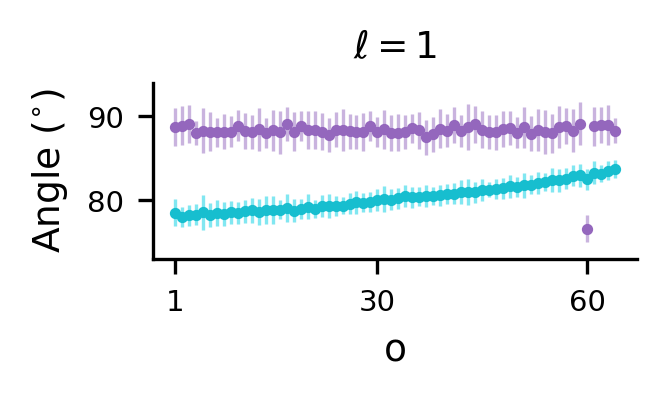

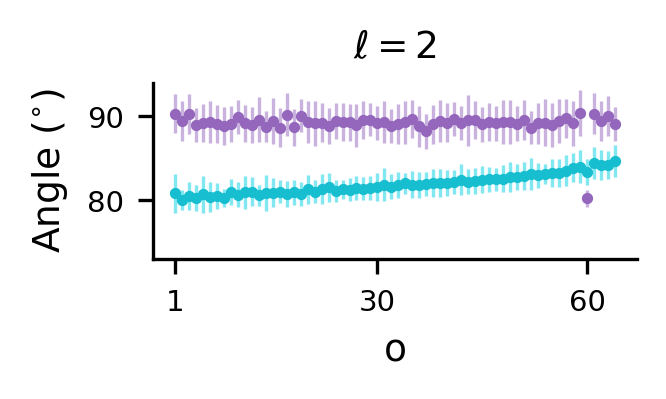

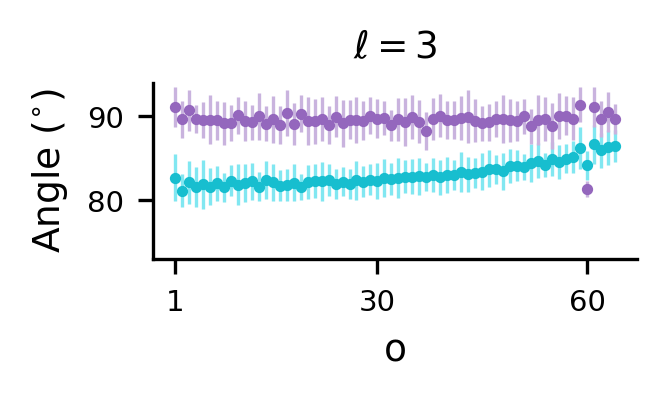

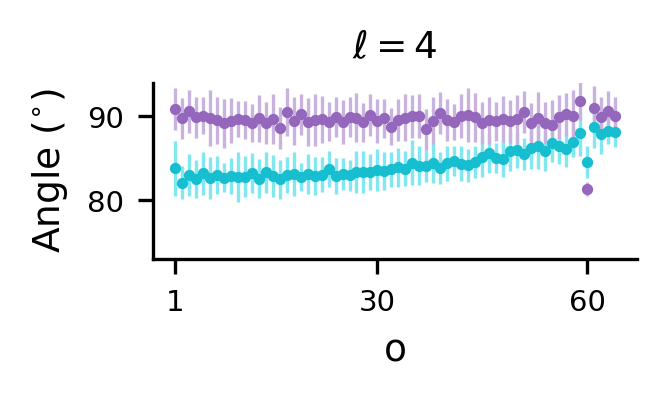

In [ ]:

markersize_= 1.7
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
# figsize_ = (figure_width2/3.9*190/168,figure_width1/3.9*2*3/4)
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/7)

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 



str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()




alignment_term_sampling_k = [65 , 125 , 1260]

alignment_term_sampling_k_max_o = 130


for l in range(1,5):
  
  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')



  k = 66
  for o in range(   1   ,   65     ):
    data_to_plot = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ] 



    mean = data_to_plot.mean() 





    # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

    # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


    std  = data_to_plot.std() 

    plt.errorbar( o , mean , std  , color = my_cycle[5]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor   = lighten_color( my_cycle2[5] , amount=0.5) )  



    # plt.plot( o , mean0 , 'o' , color = my_cycle[2] , linewidth=2 
    #     , markersize = markersize_ , markeredgewidth=.4 , )   


  k = 1260
  for o in range(   1   ,   65    ):
    # mean0 = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ]  .mean()


    data_to_plot = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ] 



    mean = data_to_plot.mean() 





    # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

    # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


    std  = data_to_plot.std() 

    plt.errorbar( o , mean , std  , color = my_cycle[6]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle2[6] , amount=0.5))  

    # plt.plot( o , mean0 , 'o' , color = my_cycle[1] , linewidth=2 
    #     , markersize = markersize_ , markeredgewidth=.4 , )   
    

    
  plt.title(r'$\ell=$' + str(l+1) , fontsize= plt_fontsize_title_   )

  plt.ylabel("Angle ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"o", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(73,94)
  # plt.ylim(59,110)
  plt.xticks(  [1,30,60]   , ['1','30','60'] )


  plt.savefig( base_directory_figure_str +  "Behavior_Noshuffle_T_k66_l"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  
  plt.show( )



##  Data shuffling

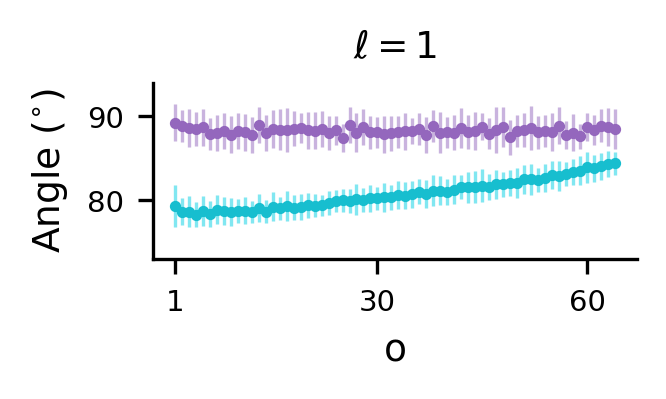

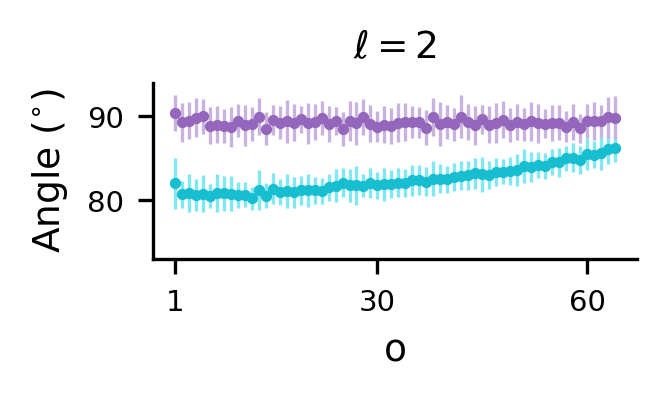

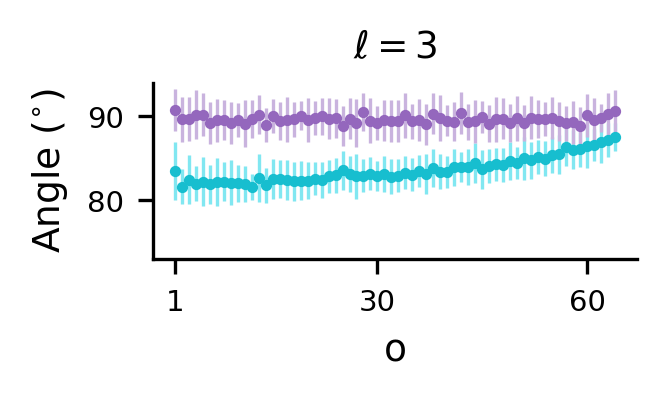

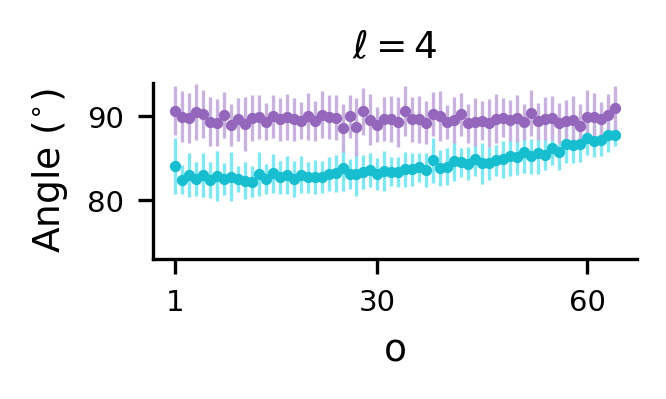

In [ ]:

markersize_= 1.7
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
# figsize_ = (figure_width2/3.9*190/168,figure_width1/3.9*2*3/4)
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/7)

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 



str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()




alignment_term_sampling_k = [65 , 125 , 1260]

alignment_term_sampling_k_max_o = 130


for l in range(1,5):
  
  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')



  k = 66
  for o in range(   1   ,   65     ):
    data_to_plot = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ] 



    mean = data_to_plot.mean() 



    std  = data_to_plot.std() 

    plt.errorbar( o , mean , std  , color = my_cycle[5]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle2[5] , amount=0.5))  




  k = 1260
  for o in range(   1   ,   65    ):



    data_to_plot = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ] 



    mean = data_to_plot.mean() 






    std  = data_to_plot.std() 

    plt.errorbar( o , mean , std  , color = my_cycle[6]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle2[6] , amount=0.5) )  


    
  plt.title(r'$\ell=$' + str(l+1) , fontsize= plt_fontsize_title_   )

  plt.ylabel("Angle ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"o", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(73,94)
  # plt.ylim(60,110)
  plt.xticks(  [1,30,60]   , ['1','30','60'] )


  plt.savefig( base_directory_figure_str +  "Behavior_shuffle_T_k66_l"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  
  plt.show( )



# Plot behaviour of alignment terms (across iterations)

## No data shuffling

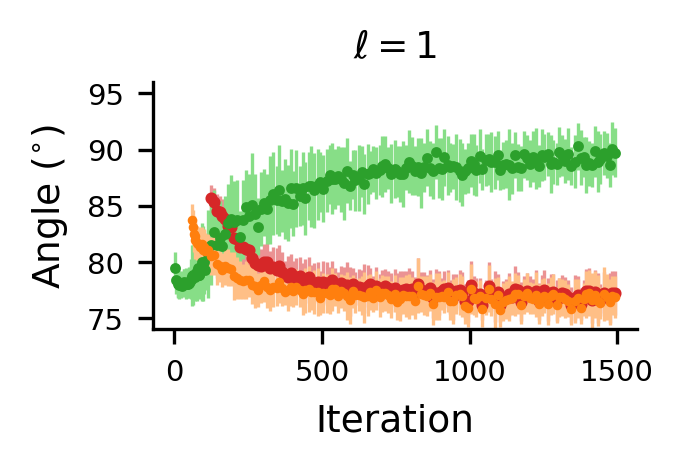

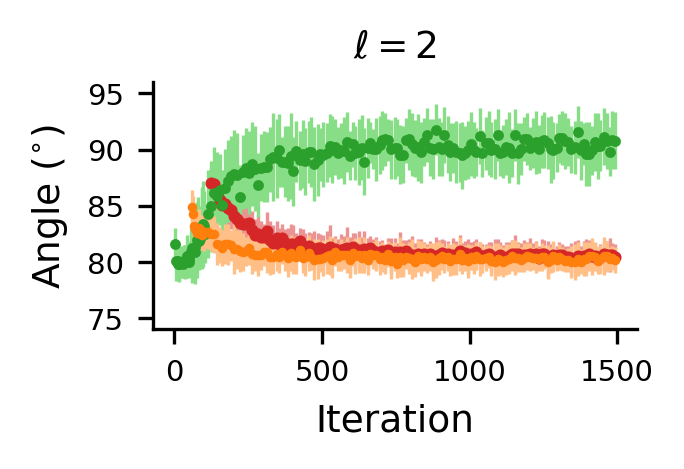

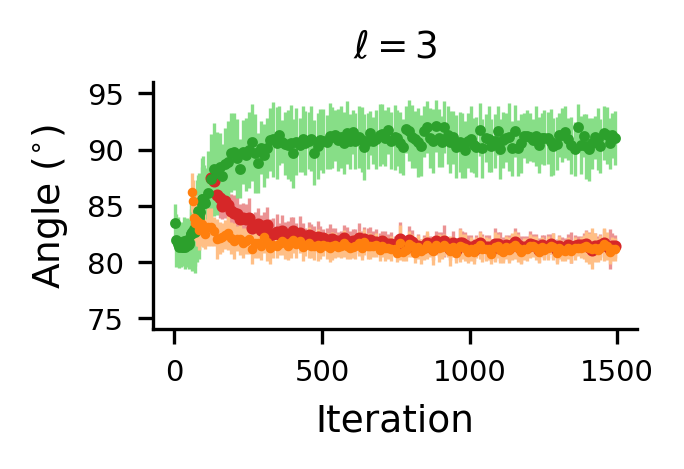

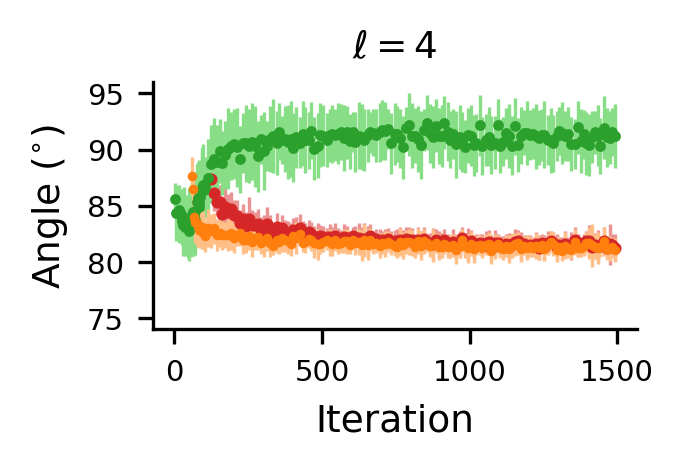

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=60
actual_angle_T_align_60_B = Save_dict["angle_T_align_"+ str(o) +"_B"]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




o=120
actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

o=61
actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  markersize_ -= markersize_step















  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Angle ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(74,96)
  plt.yticks([75,80,85,90,95])
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "alignment_terms_iteration_no_shuffle"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



##  Data shuffling

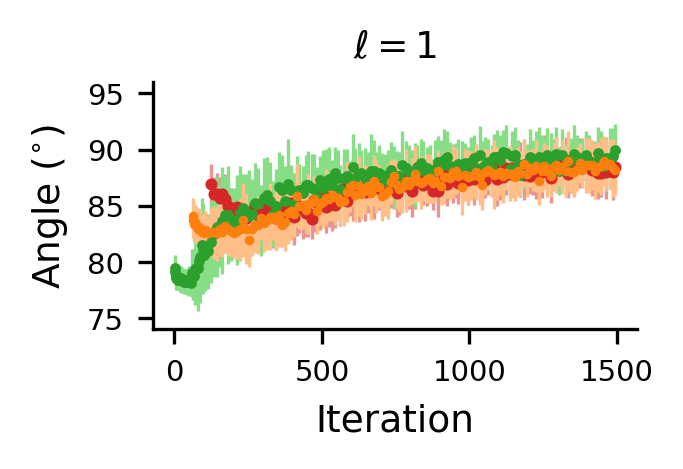

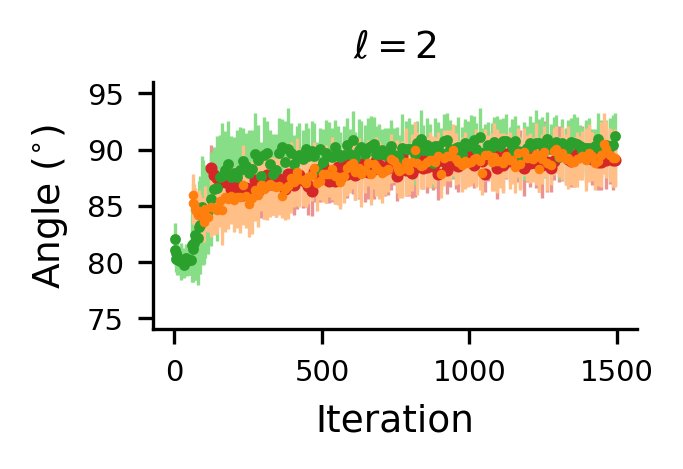

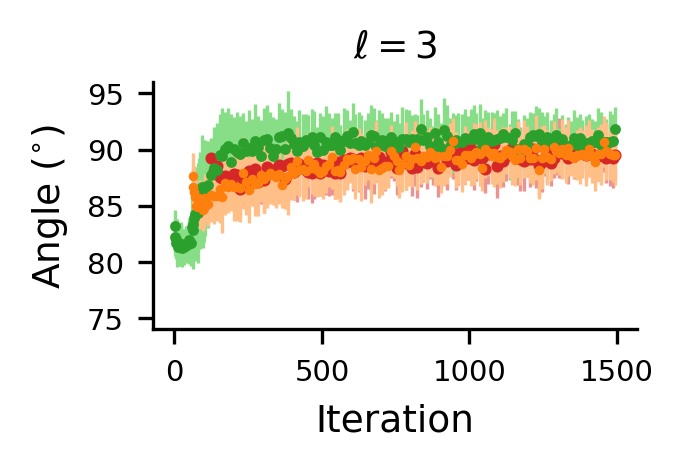

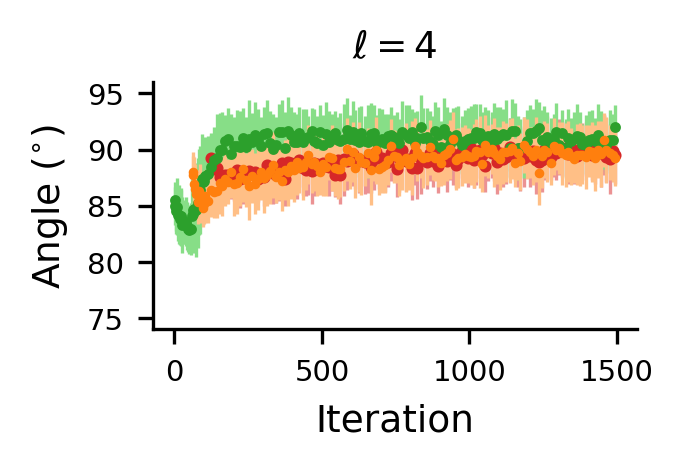

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=60
actual_angle_T_align_60_B = Save_dict["angle_T_align_"+ str(o) +"_B"]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




o=120
actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

o=61
actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  markersize_ -= markersize_step












  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5)  )  
  markersize_ -= markersize_step


    








  






  plt.ylabel("Angle ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(74,96)
  plt.yticks([75,80,85,90,95])  
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "alignment_terms_iteration_shuffle"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



In [ ]:


def Single_run_function_justW(str_dir_data_BASE 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 100
       
           ):



  batch_size = 1000
  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                     , batch_size=batch_size , device = device  
                                                                                     , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )






  N_hidden = len(code_map[0][0])

  

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"




  # str_direction_disc = str_direction_disc + "(Linear)"

  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"


  str_direction_disc = str_direction_disc + "(justW)"


  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)




  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  save_model_iterations = []
  
  if save_details == True :

    

    Save_dict = {
         "test_accuracy" : torch.zeros( [ N_repeat , N_epoch]  ),

    }



            
                     
         
            







    for key in Save_dict:
      if type(Save_dict[key]) ==  type(torch.tensor([1])):
        Save_dict[key][:] =  float('nan')



  


  sampling_list = np.array(  list( range(103,60*N_epoch,10))  + list( range(5,100,3) ) + list( range(1,5) )   )  


  sampling_noise  =  np.random.randint(0,4 , len(sampling_list) )
  sampling_noise[0:20]=0


  sampling_list = sampling_list +  sampling_noise




  eta_2 = lr*lr
  for rep in range(N_repeat):

    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )



    train_dataset = train_loader.dataset


    train_tensor = train_dataset.tensors[0].to(device)  
    targets_tensor = train_dataset.tensors[1].to(device)  




    if rep <=3:
      str_direction = str_dir_data_BASE_exp + "code_map_"  +  str(rep) +  ".txt"
      with open( str_direction  , "wb") as fp:   #Pickling
        pickle.dump( code_map  , fp)


    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')



      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)
    Dfunc = net.derivative_activation1

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):



########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal



      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100


      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
##########################################################
     

      ########################################################## Train  
      for iter , (x_in, y_n) in enumerate( train_loader ):




        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        

        for persist_i in range(persistence):




          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          


          L_f = net.forward(x_in)


          E = y_n - L_f


          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          


################################################## Update Weights

          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  


          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

     


          


          



          iteration_k = iteration_k+1





########################################################## save data





  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  # if not os.path.exists(str_dir_data_BASE_exp):
  #     os.makedirs(str_dir_data_BASE_exp)







  if save_details == True :




    str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( Save_dict  , fp)





  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    









  return net


In [ ]:
Single_run_function_justW(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 200
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 25
           )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)(justW)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.10090000405907631
epoch: 10,test_accu2: 0.8363000392913819
epoch: 20,test_accu2: 0.875400048494339
1
epoch: 0,test_accu2: 0.10090000405907631
epoch: 10,test_accu2: 0.8379000425338745
epoch: 20,test_accu2: 0.8778000414371491
2
epoch: 0,test_accu2: 0.12880000695586205
epoch: 10,test_accu2: 0.8521000444889069
epoch: 20,test_accu2: 0.8811000466346741
3
epoch: 0,test_accu2: 0.11860000416636467
epoch: 10,test_accu2: 0.8394000351428985
epoch: 20,test_accu2: 0.8818000435829163
4
epoch: 0,test_accu2: 0.09430000334978103
epoch: 10,test_accu2: 0.8045000493526459
epoch: 20,test_accu2: 0.8659000337123871
5
epoch: 0,test_accu2: 0.09580000415444374
epoch: 10,test_accu2: 0.8449000418186188
epoch: 20,test_accu2: 0.8783000349

KeyboardInterrupt: ignored

In [ ]:
Single_run_function_justW(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 100
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = True
            , compare_with_BP = False
            , N_epoch = 25
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)(justW)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.11570000126957894
epoch: 10,test_accu2: 0.8101000010967254
epoch: 20,test_accu2: 0.8504000067710876
1
epoch: 0,test_accu2: 0.09579999893903732
epoch: 10,test_accu2: 0.8250999927520752
epoch: 20,test_accu2: 0.8674999952316285
2
epoch: 0,test_accu2: 0.09719999954104423
epoch: 10,test_accu2: 0.820799994468689
epoch: 20,test_accu2: 0.8694999933242797
3
epoch: 0,test_accu2: 0.10099999979138374
epoch: 10,test_accu2: 0.8403999984264374
epoch: 20,test_accu2: 0.8749000072479248
4
epoch: 0,test_accu2: 0.10090000033378602
epoch: 10,test_accu2: 0.8338999927043915
epoch: 20,test_accu2: 0.8782000005245209
5
epoch: 0,test_accu2: 0.1135000005364418
epoch: 10,test_accu2: 0.7983999967575073
epoch: 20,test_accu2: 0.849700003862381
6
epoch: 0,test_accu2: 0.08739999979734421
epoch: 10,test_accu2: 0.7273999989032746
e

#Plot $\Delta W$ and $W$ with data shuffle vs without data shuffle

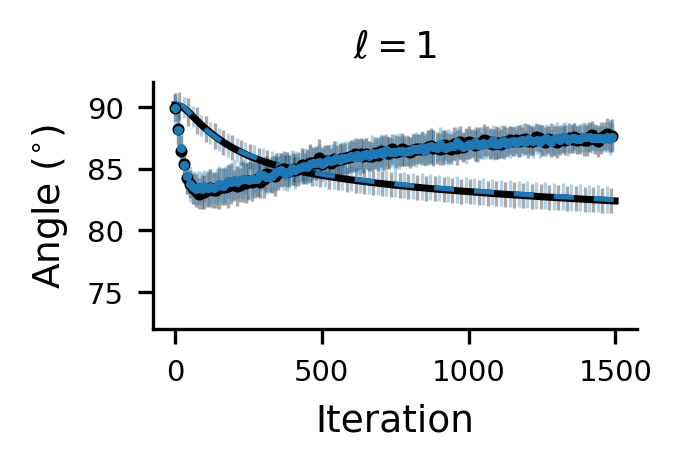

In [ ]:

################

import random

linestyle_1 =  (0, (4, 4))
# linestyle_1 =  "--"


markersize_step=0.25



plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)(justW)/" 












str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_shuffle = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B_shuffle = pickle.load(fp)









# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)(justW)/" 






str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_No_shuffle  = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B_No_shuffle = pickle.load(fp)



from_i = 0
till_i = 100


# rep_list_shuffle = np.random.randint(100, size=100)
# rep_list_No_shuffle = np.random.randint(100, size=100)


rep_list_shuffle = np.random.choice(range(100), 30, replace=False)
rep_list_No_shuffle = np.random.choice(range(100), 30, replace=False)


n_layers = angle_dW_B_No_shuffle.shape[0]
n_iter = angle_dW_B_No_shuffle.shape[2]


for l in range(1,2):
  markersize_= 1.9
  linewidth_ = 1.7


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  

  mean0 = angle_dW_B_shuffle[l,:,:].mean(dim=0) .squeeze()

  mean = mean0.clone()

  mean[:]  = float('nan')

  sampling_list = np.arange(0,n_iter ,10)  

  sampling_list  += np.random.randint(0,3 , sampling_list.shape[0])

  mean[  sampling_list  ]  = mean0[   sampling_list   ] 

  

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]




  std  = angle_dW_B_shuffle[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = "#000000"  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = "#00000055" ) 




  mean = angle_W_B_shuffle[l,rep_list_shuffle,:].mean(dim=0) .squeeze()
  std = angle_W_B_shuffle[l,rep_list_shuffle,:].std(dim=0) .squeeze()

  # print(len(mean))
  
  iteration_list =  range(15,len(mean)-1,30) 

  mean = mean[iteration_list]
  std = std[iteration_list]

  plt.errorbar(  iteration_list , mean , std  , color = 'k'  , linewidth= 0  , marker = None   , markersize = 0   , elinewidth=0.8 , ecolor = "#00000055" ) 

  plt.plot( range(0,n_iter)   ,  angle_W_B_shuffle[l,rep_list_shuffle,0:n_iter].mean(dim=0)  ,    linestyle = '-', color = 'k' , linewidth=linewidth_  )
    





#####
  markersize_ = 1.2
  linewidth_ = 1.2
  

  mean0 = angle_dW_B_No_shuffle[l,:,:].mean(dim=0) .squeeze()

  mean = mean0.clone()

  mean[:]  = float('nan')

  sampling_list = np.arange(0,n_iter ,10)  

  sampling_list  += np.random.randint(0,3 , sampling_list.shape[0])

  mean[  sampling_list  ]  = mean0[   sampling_list   ] 

  

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]




  std  = angle_dW_B_No_shuffle[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[0]   , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor =  my_cycle2[0] ) 




  mean = angle_W_B_No_shuffle[l,rep_list_No_shuffle,:].mean(dim=0) .squeeze()
  std = angle_W_B_No_shuffle[l,rep_list_No_shuffle,:].std(dim=0) .squeeze()

  iteration_list =  range(0,len(mean),30) 
  # print(len(mean))
  mean = mean[iteration_list]
  std = std[iteration_list]

  plt.errorbar(  iteration_list , mean , std  , color = my_cycle[0]   , linewidth= 0  , marker = None   , markersize = 0   , elinewidth=0.8 , ecolor =  my_cycle2[0] ) 


  # # plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  # plt.fill_between( range(len(mean))  , mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



  plt.plot( range(0,n_iter)  ,  angle_W_B_No_shuffle[l,rep_list_No_shuffle,0:n_iter].mean(dim=0)  ,  linestyle = linestyle_1 , color = my_cycle[0]  , linewidth=linewidth_  )
    









  






  plt.ylabel("Angle ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(72,92)
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "dW_shuffle_no_shuffle_l"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



# legend

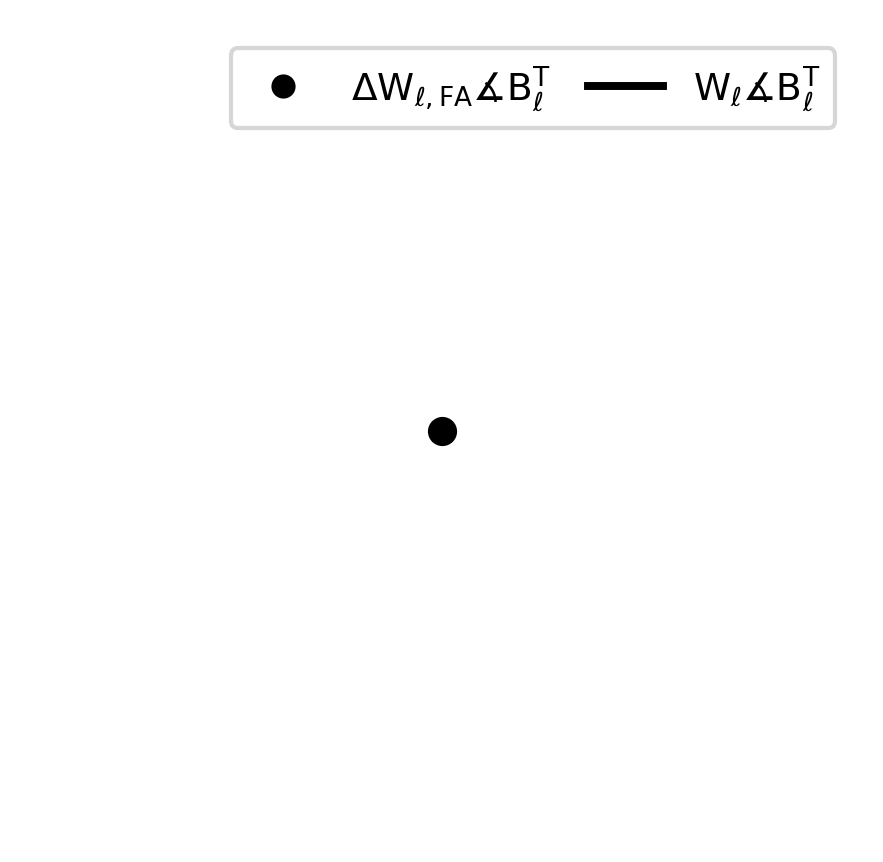

In [ ]:
# plot legend


markersize_ = .8
linewidth_ = 1.9
plt.figure(num = None, figsize=(figure_width1,figure_width1) , dpi=300, facecolor='w', edgecolor='k')



# plt.plot(  [0]  , 'o' , marker = 'o' , label = r"$T^{60}_{\ell,aln}  \measuredangle  B^T_{\ell}$" , color = my_cycle[1] , linewidth = linewidth_ )   
# plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$T^1_{\ell,aln}  \measuredangle  B^T_{\ell}$"  , color = my_cycle[2] , linewidth = linewidth_  )  
plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$\Delta W_{\ell,FA} \measuredangle  B^T_{\ell}$"  , color = 'k' , linewidth = linewidth_  )  
plt.plot(  [0]   , '-'  , label = r"$W_{\ell} \measuredangle  B^T_{\ell}$"  , color = 'k', linewidth = linewidth_  )  


 


leg =  plt.legend(  fontsize = 9  , labelspacing = 0.4 , markerscale= markersize_ ,ncol=4 , columnspacing = 1 )

for line in leg.get_lines():
    line.set_linewidth(linewidth_)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

# plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,108)
# plt.xlim(-100 ,10000)
# plt.yticks([10,30 ,50 ,70 ,90])

plt.axis('off')


def export_legend(legend, filename  , expand=[ -4 ,-4 ,4,4]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + '/legend1.jpg' )



plt.show()

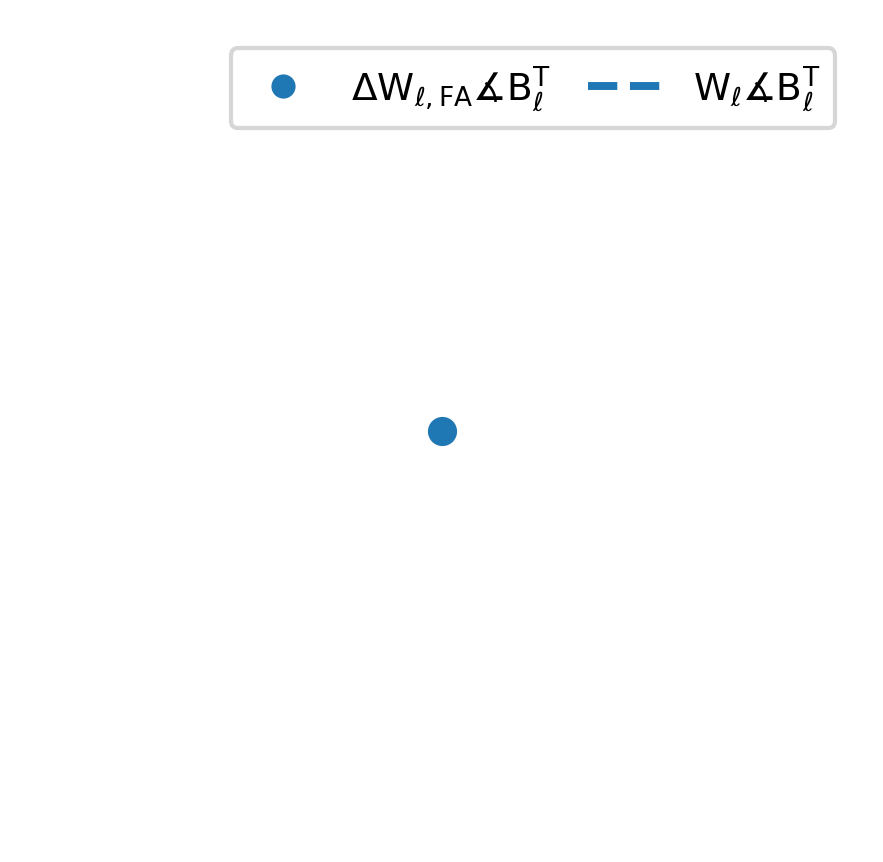

In [ ]:
# plot legend


markersize_ = .8
linewidth_ = 1.9
plt.figure(num = None, figsize=(figure_width1,figure_width1) , dpi=300, facecolor='w', edgecolor='k')



# plt.plot(  [0]  , 'o' , marker = 'o' , label = r"$T^{60}_{\ell,aln}  \measuredangle  B^T_{\ell}$" , color = my_cycle[1] , linewidth = linewidth_ )   
# plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$T^1_{\ell,aln}  \measuredangle  B^T_{\ell}$"  , color = my_cycle[2] , linewidth = linewidth_  )  
plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$\Delta W_{\ell,FA} \measuredangle  B^T_{\ell}$"  , color = my_cycle[0]  , linewidth = linewidth_  )  
plt.plot(  [0]   , '--'  , label = r"$W_{\ell} \measuredangle  B^T_{\ell}$"  , color = my_cycle[0]  , linewidth = linewidth_  )  


 


leg =  plt.legend(  fontsize = 9  , labelspacing = 0.4 , markerscale= markersize_ ,ncol=4 , columnspacing = 1 )

for line in leg.get_lines():
    line.set_linewidth(linewidth_)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

# plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,108)
# plt.xlim(-100 ,10000)
# plt.yticks([10,30 ,50 ,70 ,90])

plt.axis('off')


def export_legend(legend, filename  , expand=[ -4 ,-4 ,4,4]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + '/legend2.jpg' )



plt.show()

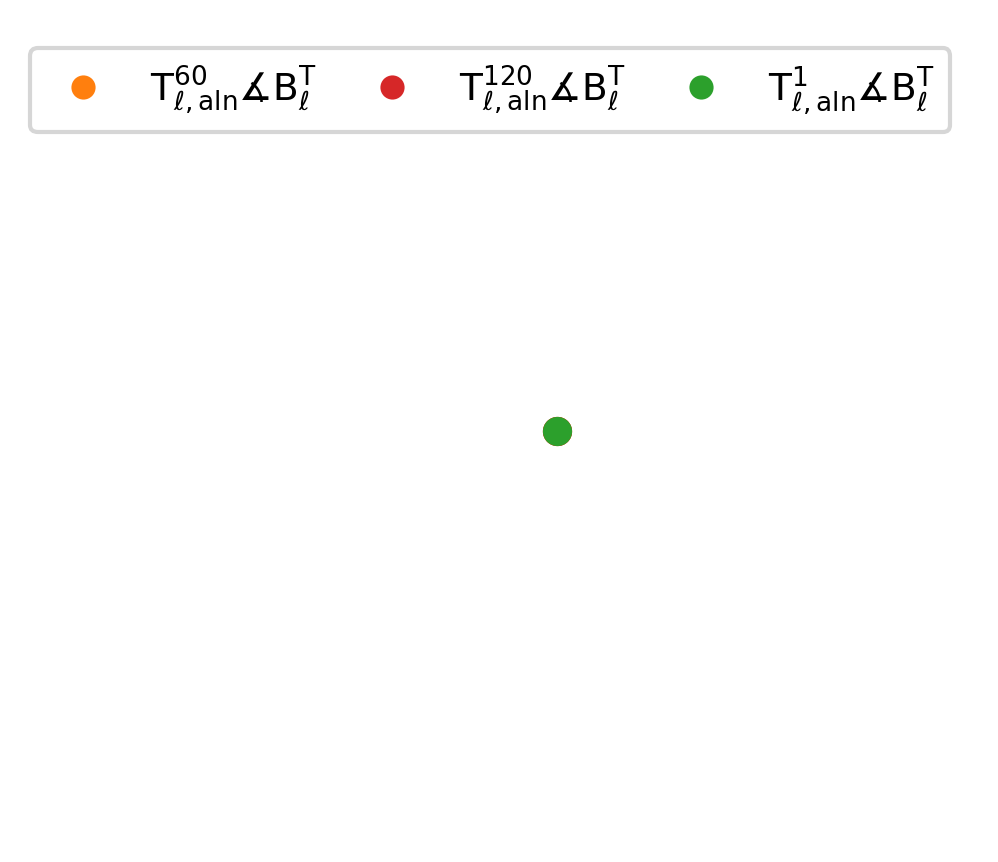

In [ ]:
# plot legend


markersize_ = .8
linewidth_ = 1.9
plt.figure(num = None, figsize=(figure_width1,figure_width1) , dpi=300, facecolor='w', edgecolor='k')



plt.plot(  [0]  , 'o' , marker = 'o' , label = r"$T^{60}_{\ell,aln}  \measuredangle  B^T_{\ell}$" , color = my_cycle[1] , linewidth = linewidth_ )   
plt.plot(  [0]  , 'o' , marker = 'o' , label = r"$T^{120}_{\ell,aln}  \measuredangle  B^T_{\ell}$" , color = my_cycle[3] , linewidth = linewidth_ )   

plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$T^1_{\ell,aln}  \measuredangle  B^T_{\ell}$"  , color = my_cycle[2] , linewidth = linewidth_  )  

# plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$\Delta W_{\ell,FA} \measuredangle  B^T_{\ell}$"  , color = 'k' , linewidth = linewidth_  )  
# plt.plot(  [0]   , '--'  , label = r"$W_{\ell} \measuredangle  B^T_{\ell}$"  , color = 'k', linewidth = linewidth_  )  


 


leg =  plt.legend(  fontsize = 9  , labelspacing = 0.4 , markerscale= markersize_ ,ncol=4 , columnspacing = 1 )

for line in leg.get_lines():
    line.set_linewidth(linewidth_)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

# plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,108)
# plt.xlim(-100 ,10000)
# plt.yticks([10,30 ,50 ,70 ,90])

plt.axis('off')


def export_legend(legend, filename  , expand=[ -4 ,-4 ,4,4]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + '/legend3.jpg' )



plt.show()

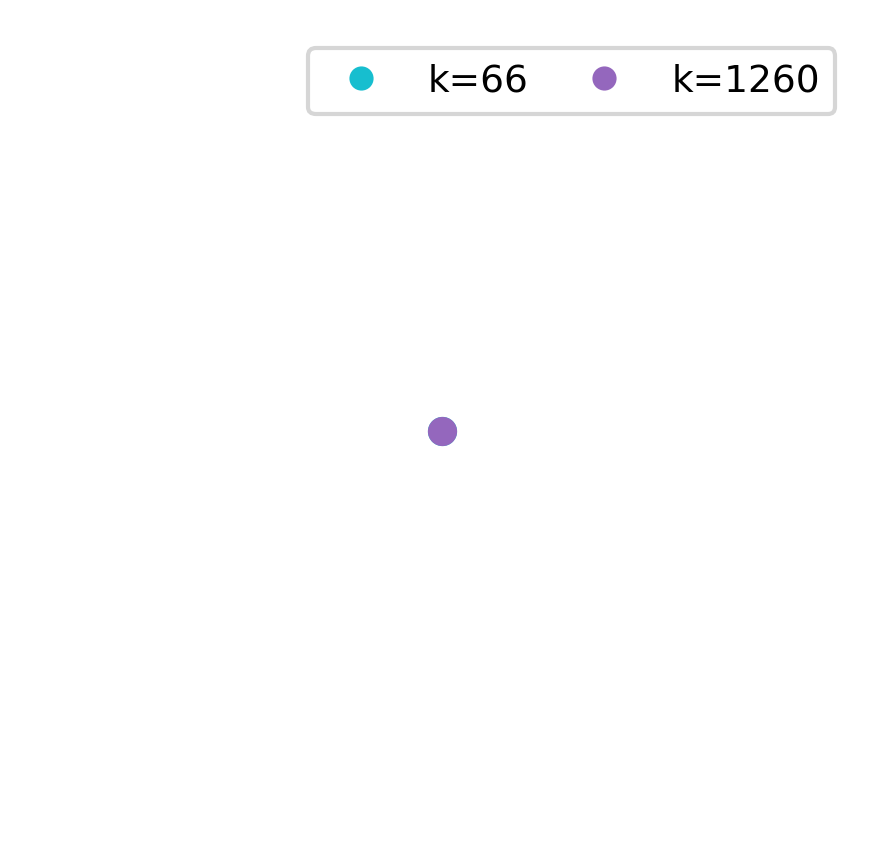

In [ ]:
# plot legend


markersize_ = .8
linewidth_ = 1.9
plt.figure(num = None, figsize=(figure_width1,figure_width1) , dpi=300, facecolor='w', edgecolor='k')



plt.plot(  [0]  , 'o' , marker = 'o' , label = r"k=66" , color = my_cycle[5] , linewidth = linewidth_ )   
plt.plot(  [0]  , 'o' , marker = 'o' , label = r"k=1260" , color = my_cycle[6] , linewidth = linewidth_ )   


# plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$\Delta W_{\ell,FA} \measuredangle  B^T_{\ell}$"  , color = 'k' , linewidth = linewidth_  )  
# plt.plot(  [0]   , '--'  , label = r"$W_{\ell} \measuredangle  B^T_{\ell}$"  , color = 'k', linewidth = linewidth_  )  


 


leg =  plt.legend(  fontsize = 9  , labelspacing = 0.4 , markerscale= markersize_ ,ncol=4 , columnspacing = 1 )

for line in leg.get_lines():
    line.set_linewidth(linewidth_)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

# plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,108)
# plt.xlim(-100 ,10000)
# plt.yticks([10,30 ,50 ,70 ,90])

plt.axis('off')


def export_legend(legend, filename  , expand=[ -4 ,-4 ,4,4]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + '/legend4.jpg' )



plt.show()

# giving wrong labels

In [ ]:

# coding_layers should be a list of number of neurons in each layer 
# ones_in_layes should be a list of number of ones in each coding vector


from torchvision import datasets, transforms


import torchvision


import cv2
import PIL.Image



def get_MNIST_dataset_wrong_shuffle( percent_shuffle_fixed_labels , coding_layers , ones_in_layes    , batch_size , device = device  , flatten = True ,  size = 28 , code_map = None , shuffle  = False):

  MNIST_original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True , download=True  ,   transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize( size  ), torchvision.transforms.ToTensor()]
        
        ))
  
  MNIST_original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False , download=True   ,  transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize( size  ), torchvision.transforms.ToTensor()]
        
        ))

  num_workers = 0



  if code_map==None :
    code_map = my_coding.get_n_hot_coding_map( coding_layers , ones_in_layes   , 10 )

  


  train_targets = MNIST_original_train_dataset.targets.clone()

  n_wrong_change = int( len(train_targets) *  percent_shuffle_fixed_labels/100  )


  # print(  n_wrong_change)
  # print(  type(train_targets) )
  # print(  (train_targets.shape) )


  change_index = np.random.choice(  len(train_targets)  , n_wrong_change, replace=False)
  wrong_labels = np.random.choice( 10 , n_wrong_change, replace=True)

  train_targets[change_index] = torch.tensor(wrong_labels)

  # print(  (train_targets == MNIST_original_train_dataset.targets).sum()/60000 )


  if code_map==None :
    code_map = my_coding.get_n_hot_coding_map( coding_layers , ones_in_layes   , 10 )


  coded_train_labels = my_coding.code_category( code_map , train_targets )

  coded_train_labels_cat = torch.cat( coded_train_labels  , dim=1  ) 




  coded_test_labels = my_coding.code_category( code_map , MNIST_original_test_dataset.targets  )
  coded_test_labels_cat = torch.cat( coded_test_labels  , dim=1  ) 


  
  x_train = MNIST_original_train_dataset.data / 255.0
 
  if size!=28:
    dataset_data_resized = torch.zeros([ len(MNIST_original_train_dataset) , size , size ]).to(dtype)

    for i in range( len(MNIST_original_train_dataset)   ):
      dataset_data_resized[i] = torch.tensor(  cv2.resize( x_train[i].numpy()  ,  ( int( size ) , int( size )  )  ) ).to(dtype)

    x_train = dataset_data_resized

  if (flatten == True ):
    x_train = x_train.reshape(  [ MNIST_original_train_dataset.data.shape[0] , -1 ]  ) .to(dtype)
  else:
    x_train = x_train.unsqueeze(  1)


  x_test = MNIST_original_test_dataset.data / 255.0

  if size!=28:
    dataset_data_resized = torch.zeros([ len(MNIST_original_test_dataset) , size , size ]).to(dtype)

    for i in range( len(MNIST_original_test_dataset)   ):
      dataset_data_resized[i] = torch.tensor(  cv2.resize( x_test[i].numpy()  ,  ( int( size ) , int( size )  )  ) ).to(dtype)

    x_test = dataset_data_resized

  if (flatten == True ):
    x_test = x_test.reshape(  [ MNIST_original_test_dataset.data.shape[0] , -1 ]  ) .to(dtype)
  else:
     x_test = x_test.unsqueeze(  1)

  # print("x_train.shape : " + str(x_train.shape) )
  # print("x_test.shape  : " + str(x_test.shape)  )

  # print("y_train.shape : " + str(coded_train_labels_cat.shape)  )
  # print("y_test.shape  : " + str(MNIST_original_test_dataset.targets.shape)  )



  # fig = plt.figure(num = None, figsize=(5,25)  , dpi=90, facecolor='w', edgecolor='k')
  # plt.subplot(1, 5, 1)
  # plt.imshow( x_train[0].view(size,size)  )

  # plt.axis('off')
  # plt.subplot(1, 5, 2)
  # plt.imshow( x_train[10].view(size,size) )
  # plt.axis('off')
  # plt.subplot(1, 5, 3)
  # plt.imshow( x_train[100].view(size,size)  )
  # plt.axis('off')
  # plt.subplot(1, 5, 4)
  # plt.imshow( x_train[99].view(size,size)  )
  # plt.axis('off')
  # plt.subplot(1, 5, 5)
  # plt.imshow( x_train[88].view(size,size)  )        
  # plt.axis('off')
  # plt.show()



  train_dataset = torch.utils.data.TensorDataset(   x_train.to('cpu')    , coded_train_labels_cat.to('cpu')     )
  test_dataset = torch.utils.data.TensorDataset(   x_test.to('cpu')  ,  MNIST_original_test_dataset.targets.to(dtype).to('cpu')    )

  train_loader = torch.utils.data.DataLoader( dataset=train_dataset , batch_size=batch_size , shuffle=shuffle , num_workers=num_workers , pin_memory=True )
  test_loader = torch.utils.data.DataLoader(  dataset=test_dataset , batch_size=batch_size , shuffle=False , num_workers=num_workers ,pin_memory=True    )

  inputs, classes = next(iter(train_loader))  

  # print("train loader x shape" + str( inputs.shape  )  )
  # print("train loader y shape" + str( classes.shape  )  )



  inputs, classes = next(iter(test_loader))  

  # print("test loader x shape" + str( inputs.shape  )  )
  # print("test loader y shape" + str( classes.shape  )  )


  x_shape = inputs.shape[1:]  
  return train_loader , test_loader , code_map , x_shape


# get_MNIST_dataset_shuffle( percent_shuffle_fixed_labels=30
#                           , coding_layers = [50] , ones_in_layes = [5]   
#                           , batch_size =1000 , device = device 
#                           , flatten = True ,  size = 15 , code_map = None , shuffle  = False)


In [ ]:


def Single_run_function_wrong_labels(str_dir_data_BASE 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 100
       
           ):



  batch_size = 1000
  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                     , batch_size=batch_size , device = device  
                                                                                     , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )






  N_hidden = len(code_map[0][0])

  

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"

  # str_direction_disc = str_direction_disc + "(Linear)"

  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"


  str_direction_disc = str_direction_disc + "(shuffle100)"


  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)




  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  save_model_iterations = []
  
  if save_details == True :

    

    Save_dict = {
         "test_accuracy" : torch.zeros( [ N_repeat , N_epoch]  )
    }



            
                     
         
            





    alignment_term_sampling_k = [ 66  , 1260 ]

    alignment_term_sampling_k_max_o = 66

    for k in alignment_term_sampling_k:
      for o in range(   1   ,   np.min([k,alignment_term_sampling_k_max_o])      ):
        Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
        Save_dict["random_data_angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')



    sampling_lags = [1,59,60,61,120]

    for o in sampling_lags:
      Save_dict["angle_T_align_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')




    for key in Save_dict:
      if type(Save_dict[key]) ==  type(torch.tensor([1])):
        Save_dict[key][:] =  float('nan')



  


  sampling_list = np.array(  list( range(103,60*N_epoch,10))  + list( range(5,100,3) ) + list( range(1,5) )   )  


  sampling_noise  =  np.random.randint(0,4 , len(sampling_list) )
  sampling_noise[0:20]=0


  sampling_list = sampling_list +  sampling_noise




  eta_2 = lr*lr
  for rep in range(N_repeat):

    train_loader , test_loader , code_map , x_shape = get_MNIST_dataset_wrong_shuffle( percent_shuffle_fixed_labels = 100
                            , coding_layers = [50] , ones_in_layes = [5]   
                            , batch_size =1000 , device = device 
                            , flatten = True ,  size = 15 , code_map = None , shuffle  = False)


    train_dataset = train_loader.dataset


    train_tensor = train_dataset.tensors[0].to(device)  
    targets_tensor = train_dataset.tensors[1].to(device)  











    if rep <=3:
      str_direction = str_dir_data_BASE_exp + "code_map_"  +  str(rep) +  ".txt"
      with open( str_direction  , "wb") as fp:   #Pickling
        pickle.dump( code_map  , fp)


    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_k_l = []
      delta_BP_k_l = []
      # E_list_k_l = []
      L_k_l = []
      Z_k_l = []
      W_k_l = []
      target_k = []


      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)
    Dfunc = net.derivative_activation1

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):



########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal



      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100


      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
##########################################################
     

      ########################################################## Train  
      for iter , (x_in, y_n) in enumerate( train_loader ):




        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        

        for persist_i in range(persistence):

          if iteration_k in save_model_iterations:
            str_direction = str_dir_data_BASE_exp + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
            net.save_model(str_direction)


 
          if save_details == True :
            W_l = []
            target_k .append( my_coding.decode_category( code_map , [ y_n ]  ).view([-1]  ).to('cpu').clone()  )
            for l in range(L_N_layers):
              W_l .append(  net.W[l].detach().clone() )
            W_k_l . append(  W_l   )
            



          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          


          L_f = net.forward(x_in)


          E = y_n - L_f

          if compare_with_BP==True or FA_method==False:
            Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP

          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          


################################################## Update Weights

          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  


          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:

              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()


          if compare_with_BP==True :
            for l in range(N_layers):
              angle_dW_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

            for l in range(1,N_layers+1):
              angle_dBiad_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
           




          


  

                  

              

          if save_details == True :
    
          #   for l in range(N_layers):
          #     dW_norms[  l  ,  rep  ,  iteration_k   ] = lr*Delta_fa[l].norm()
          #     dW_norms_BP[  l  ,  rep  ,  iteration_k   ] = lr*Delta_bp[l].norm()


            delta_l = []
            # E_l = []
            L_l = []
            Z_l = []

            for l in range(L_N_layers+1):
              L_l .append(net.L[l].detach().clone())

            delta_l.append(None)
            # E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              if FA_method==True:
                delta_l.append(net.delta_FA[l].detach().clone())
              if FA_method==False:
                delta_l.append(net.delta_BP[l].detach().clone())

              # E_l.append(net.E_FA[l].detach().clone())
              Z_l .append(net.Z[l].detach().clone())



            delta_k_l . append(  delta_l  )
            # delta_BP_k_l.append(  delta_BP_l  )
            # E_list_k_l . append(  E_l   )
            L_k_l . append(  L_l   )
            Z_k_l . append(  Z_l   )

            


            if  iteration_k in alignment_term_sampling_k :

              for  l in range(1,L_N_layers):
                for o in range(   1   ,   np.min([ iteration_k  , alignment_term_sampling_k_max_o  ])      ):
                  k=-1

                  alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                      ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                      ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                      ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                          
                  # alignment_term = calculate_alignment_term_linear(
                  #                   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                  #                   ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                  #                   ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )

                  Save_dict["angle_T_align_"+ str(o) + "_" +  str(iteration_k)  +"_B"] [l , rep  ]   = my_weight.angle(   alignment_term   , net.B[l].t()   ) 







            if iteration_k in sampling_list :
              
           
                for  l in range(1,L_N_layers):

                  for o in sampling_lags :

                    if o <= iteration_k:
                      k=-1

###################################################################################################################
                      # calculating actual alignment term 
                      if True:
                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        

                   
                        Save_dict["angle_T_align_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   ) 

                        


            if len( W_k_l ) > 140 :
              delta_k_l.pop(0)
              L_k_l.pop(0)
              Z_k_l.pop(0)
              W_k_l.pop(0)


          


          



          iteration_k = iteration_k+1





########################################################## save data





  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  # if not os.path.exists(str_dir_data_BASE_exp):
  #     os.makedirs(str_dir_data_BASE_exp)







  if save_details == True :




    str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( Save_dict  , fp)





  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    









  return net


In [ ]:
Single_run_function_wrong_labels(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 30
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = True
            , compare_with_BP = False
            , N_epoch = 25
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)(shuffle100)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.09800000116229057
epoch: 10,test_accu2: 0.10319999903440476
epoch: 20,test_accu2: 0.10549999922513961
1
epoch: 0,test_accu2: 0.1135000005364418
epoch: 10,test_accu2: 0.11399999931454659
epoch: 20,test_accu2: 0.10499999970197678
2
epoch: 0,test_accu2: 0.10099999979138374
epoch: 10,test_accu2: 0.07319999858736992
epoch: 20,test_accu2: 0.130799999833107
3
epoch: 0,test_accu2: 0.0973999984562397
epoch: 10,test_accu2: 0.11490000039339066
epoch: 20,test_accu2: 0.13530000299215317
4
epoch: 0,test_accu2: 0.09579999893903732
epoch: 10,test_accu2: 0.09519999995827674
epoch: 20,test_accu2: 0.09029999971389771
5
epoch: 0,test_accu2: 0.09910000115633011
epoch: 10,test_accu2: 0.10329999998211861
epoch: 20,test_accu2: 0.09890000075101853
6
epoch: 0,test_accu2: 0.09579999893903732
epoch: 10,test_accu2: 0.09

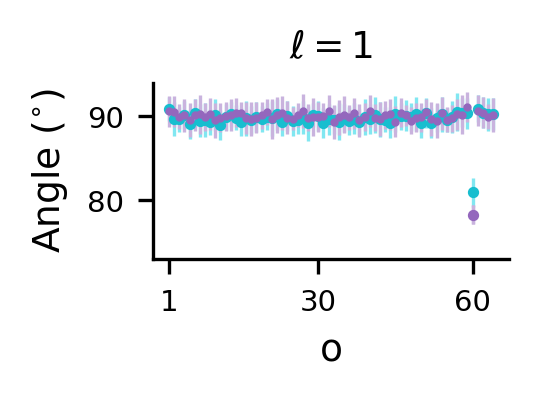

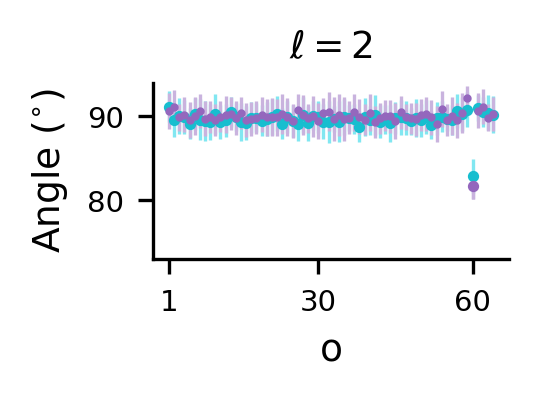

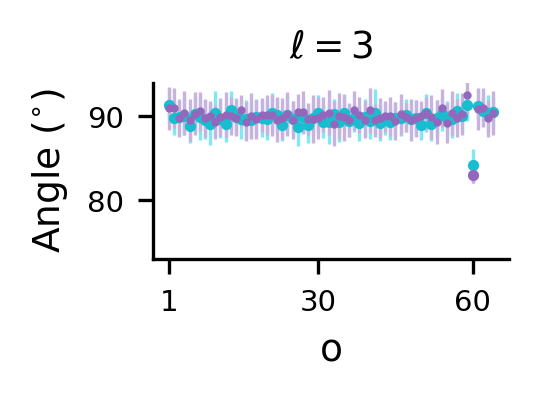

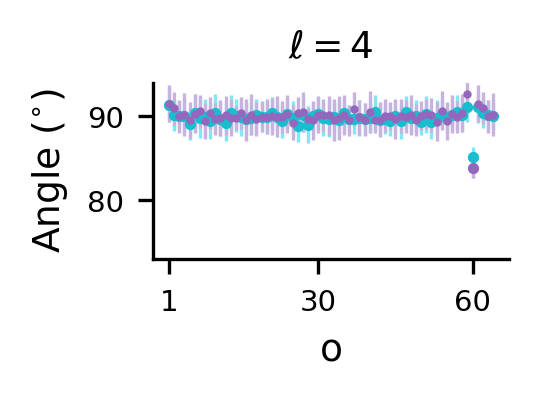

In [ ]:

markersize_= 1.7
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
# figsize_ = (figure_width2/3.9*190/168,figure_width1/3.9*2*3/4)
# figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/7)

figsize_ = (figure_width2/6 *1.23 ,  figure_width1/3.9*2*3/7  )

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)(shuffle100)/" 



str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()




alignment_term_sampling_k = [65 , 125 , 1260]

alignment_term_sampling_k_max_o = 130


for l in range(1,5):
  
  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')



  k = 66
  for o in range(   1   ,   65     ):
    data_to_plot = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ] 



    mean = data_to_plot.mean() 





    # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

    # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


    std  = data_to_plot.std() 

    plt.errorbar( o , mean , std  , color = my_cycle[5]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor   = lighten_color( my_cycle2[5] , amount=0.5) )  



    # plt.plot( o , mean0 , 'o' , color = my_cycle[2] , linewidth=2 
    #     , markersize = markersize_ , markeredgewidth=.4 , )   


  k = 1260
  for o in range(   1   ,   65    ):
    # mean0 = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ]  .mean()


    data_to_plot = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ] 



    mean = data_to_plot.mean() 





    # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

    # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


    std  = data_to_plot.std() 

    plt.errorbar( o , mean , std  , color = my_cycle[6]  , linewidth=0 , marker = 'o'  
                 , markersize = markersize_-0.7  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle2[6] , amount=0.5))  


  k = 1260
  for o in range(  60   ,   61    ):
    # mean0 = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ]  .mean()


    data_to_plot = Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"]  [ l  , :  ] 



    mean = data_to_plot.mean() 





    # plt.plot( iteration_list   ,  mean , 'o' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )

    # plt.plot( range(0,n_iter)   ,  angle_sum_zero_degree_term_B[l,0,0:n_iter]  , '-' , color = my_cycle[l] , markersize = markersize_ , linewidth=linewidth_  )


    std  = data_to_plot.std() 

    plt.errorbar( o , mean , std  , color = my_cycle[6]  , linewidth=0 , marker = 'o'  
                 , markersize = markersize_  , elinewidth=0.8 , ecolor  = lighten_color( my_cycle2[6] , amount=0.5))  
    



    # plt.plot( o , mean0 , 'o' , color = my_cycle[1] , linewidth=2 
    #     , markersize = markersize_ , markeredgewidth=.4 , )   
    

    
  plt.title(r'$\ell=$' + str(l+1) , fontsize= plt_fontsize_title_   )

  plt.ylabel("Angle ($^{\circ}$)", fontsize= plt_fontsize_text_)
  plt.xlabel(r"o", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(73,94)
  # plt.ylim(59,110)
  plt.xticks(  [1,30,60]   , ['1','30','60'] )


  plt.savefig( base_directory_figure_str +  "Behavior_wronglabel_Noshuffle_T_k66_l"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  
  plt.show( )

